In [20]:
import numpy as np 
from matplotlib import pyplot as plt 
from tqdm import tqdm

In [23]:
def runge_kutta(f, tf, h, v0):
    N = int(tf/h)
    v = np.zeros((N, v0.shape[0]))
    v[0, :] = v0 
    for i in range(N-1): 
        k1 = f(i*h, v[i, :])
        k2 = f((i+1/2)*h, v[i, :] + h*k1/2)
        k3 = f((i+1/2)*h, v[i, :] + h*k2/2)
        k4 = f((i+1)*h, v[i, :] + h*k3)
        v[i+1, :] = v[i, :] + h*(k1+2*(k2+k3)+k4)/6
    return v 

In [22]:
Q = 79 # charge of gold nucleaus in e units 
q = 2 # charge of alpha particle in e units 
e2 = 1.44 # MeVfm
mn = 939.5654133 # MeV/c**2
mp = 938.2720813 # MeV/c**2 
m_alpha = 2*(mn+mp)
A = 197
RT = 1.2*A**(1/3)
E_alpha = 5 #MeV 
Valpha = np.sqrt(2*E_alpha/m_alpha) 
x0 = -100 #fm 
impact_parameter = np.arange(-200,200,5) #fm 
tf = 10000 #fm/c

In [14]:
def rutherford(t, v):
    r = lambda x, y : max(np.sqrt(x**2+y**2), RT) 
    vdot = np.zeros((4))
    vdot[0] = v[1] 
    vdot[1] = (q*Q*e2*v[0])/(m_alpha*r(v[0], v[2])**3)
    vdot[2] = v[3]
    vdot[3] = (q*Q*e2*v[2])/(m_alpha*r(v[0], v[2])**3)
    return vdot 

In [36]:
v_b = []
for y0 in tqdm(impact_parameter):
    v0 = np.array([x0, Valpha, y0, 0])
    v_b.append(runge_kutta(rutherford, 10000, 0.1, v0))

100%|██████████| 40/40 [02:33<00:00,  3.84s/it]


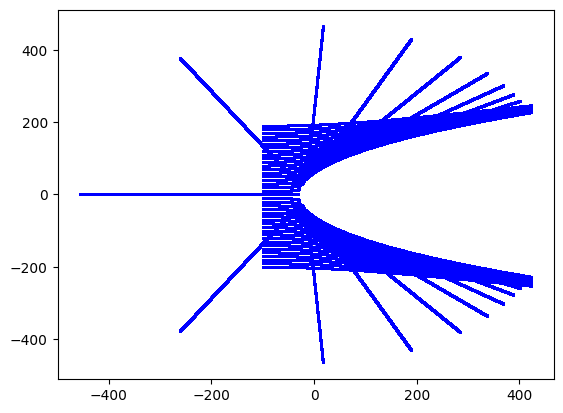

In [41]:
for v in v_b:
    plt.scatter(v[:,0], v[:, 2], color="blue", s=.5)
